
# Challenge #17: Sorting on a Systolic Array

**Learning Goals:**
* Learn how to implement Bubble sort on a systolic array (conceptually).
* Evaluate its performance as a function of the problem size (using a sequential implementation for demonstration).

**Tasks:**
1. Design a systolic array that can do Bubble sort. What dimension does the array need to have?
2. (Vibe) Code a software version in your favorite language and test it.
3. Visualize the execution times for various sorting sizes.

## Task 1: Systolic Array Design for Bubble Sort

**Concept:**
A systolic array for sorting typically uses a linear arrangement of processing elements (PEs) that perform compare-and-swap operations. Data flows through these PEs in a rhythmic pattern.

**Processing Element (PE):**
Each PE would be a simple **compare-and-swap unit**. It takes two inputs and outputs the minimum on one line and the maximum on the other.

Inputs: $A_{in}$, $B_{in}$
Operation: Compare $A_{in}$ and $B_{in}$.
Outputs: $A_{out} = \min(A_{in}, B_{in})$, $B_{out} = \max(A_{in}, B_{in})$ (The direction of min/max output depends on the specific design's data flow).

**Array Structure and Data Flow:**
For Bubble Sort, which is inherently a 1D algorithm (comparing adjacent elements in a list), a **1-dimensional linear array** is the most suitable systolic structure.

Imagine $N$ data elements being fed into one end of a linear array containing $N$ PEs. Each PE performs a compare-and-swap operation on the data items that meet within it during a clock cycle. As data items move from one PE to the next and interact over multiple cycles, the sorting is achieved. The largest elements "bubble up" to one end, and the smallest to the other, similar to the sequential algorithm.

**Dimension:**
The array needs to be **1-dimensional**.

**Size:**
To sort $N$ elements, the linear systolic array typically requires **$N$ processing elements**.

**Summary:** A 1-dimensional linear array of $N$ compare-and-swap processing elements, where data flows through the array.


In [3]:
# Imports needed for the following tasks
import random
import time
import matplotlib.pyplot as plt

print("Imports complete.")

Imports complete.


In [4]:
## Task 2: Software Implementation of Bubble Sort

def bubble_sort(arr):
    """Implements the standard sequential Bubble Sort algorithm."""
    n = len(arr)
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place, so we don't need to compare up to n-1
        # The inner loop goes from 0 to the first unsorted element (n-i-1)
        for j in range(0, n - i - 1):
            # Traverse the array
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# --- Test the implementation ---
print("Testing Bubble Sort:")
test_array_1 = [64, 34, 25, 12, 22, 11, 90]
print("Original array 1:", test_array_1)
bubble_sort(test_array_1)
print("Sorted array 1:", test_array_1)

test_array_2 = [5, 1, 4, 2, 8]
print("\nOriginal array 2:", test_array_2)
bubble_sort(test_array_2)
print("Sorted array 2:", test_array_2)

test_array_3 = []
print("\nOriginal array 3 (empty):", test_array_3)
bubble_sort(test_array_3)
print("Sorted array 3 (empty):", test_array_3)

test_array_4 = [7]
print("\nOriginal array 4 (single element):", test_array_4)
bubble_sort(test_array_4)
print("Sorted array 4 (single element):", test_array_4)

Testing Bubble Sort:
Original array 1: [64, 34, 25, 12, 22, 11, 90]
Sorted array 1: [11, 12, 22, 25, 34, 64, 90]

Original array 2: [5, 1, 4, 2, 8]
Sorted array 2: [1, 2, 4, 5, 8]

Original array 3 (empty): []
Sorted array 3 (empty): []

Original array 4 (single element): [7]
Sorted array 4 (single element): [7]


In [5]:
## Task 3: Measure and Visualize Execution Times

# Define the input sizes to test
# Choose sizes that are powers of 10 and some intermediates to see the curve clearly
sizes = [10, 100, 500, 1000, 2000, 5000, 10000, 15000, 20000] # Added more sizes

# Store execution times
execution_times = []

print("Measuring execution times for sequential Bubble Sort...")

# Measure time for each size
for size in sizes:
    # Generate a list of random integers for the given size
    # Using a range much larger than the size to avoid too many duplicates
    data = [random.randint(0, size * 20) for _ in range(size)]

    # Measure the execution time using a high-resolution timer
    start_time = time.perf_counter()
    bubble_sort(data)
    end_time = time.perf_counter()

    duration = end_time - start_time
    execution_times.append(duration)

    print(f"Size: {size}, Time: {duration:.6f} seconds")

print("\nMeasurement complete.")

Measuring execution times for sequential Bubble Sort...
Size: 10, Time: 0.000009 seconds
Size: 100, Time: 0.000420 seconds
Size: 500, Time: 0.014099 seconds
Size: 1000, Time: 0.047136 seconds
Size: 2000, Time: 0.265181 seconds
Size: 5000, Time: 1.276942 seconds
Size: 10000, Time: 6.040608 seconds
Size: 15000, Time: 13.147821 seconds
Size: 20000, Time: 22.512883 seconds

Measurement complete.


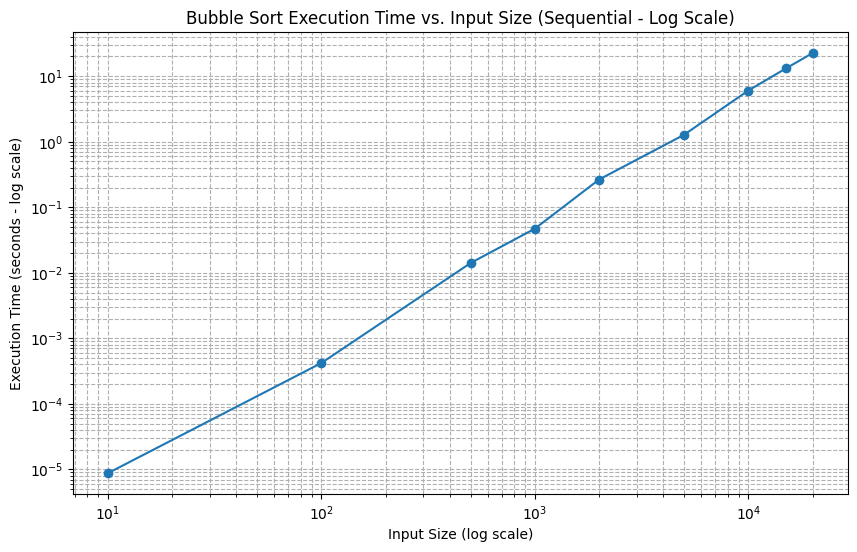

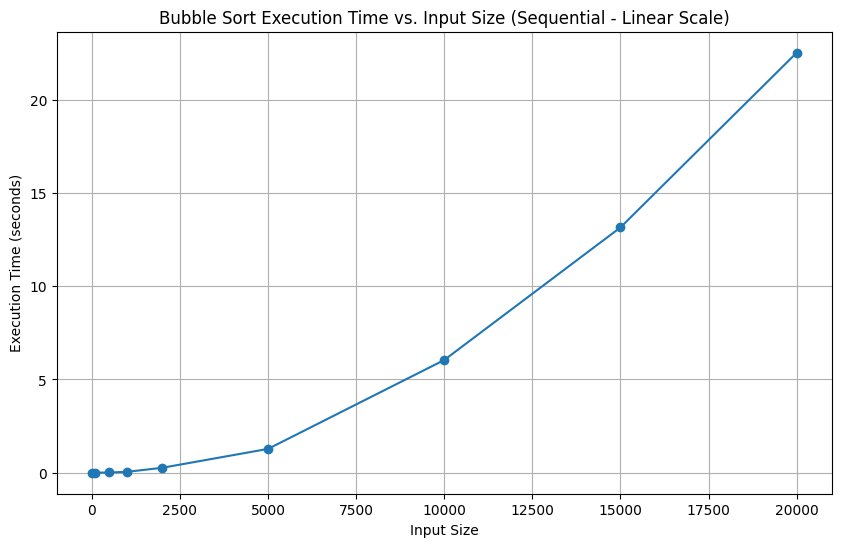

In [6]:
# Visualize the results

# Plotting on a log-log scale is good for identifying polynomial relationships
plt.figure(figsize=(10, 6))
plt.plot(sizes, execution_times, marker='o', linestyle='-')
plt.title('Bubble Sort Execution Time vs. Input Size (Sequential - Log Scale)')
plt.xlabel('Input Size (log scale)')
plt.ylabel('Execution Time (seconds - log scale)')
plt.xscale('log') # Use log scale for x-axis
plt.yscale('log') # Use log scale for y-axis
plt.grid(True, which="both", ls="--") # Add grid for better readability
plt.show()

# Plotting on a linear scale shows the rapid increase more intuitively
plt.figure(figsize=(10, 6))
plt.plot(sizes, execution_times, marker='o', linestyle='-')
plt.title('Bubble Sort Execution Time vs. Input Size (Sequential - Linear Scale)')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()



## Interpretation of Results

The plots clearly show how the execution time of the sequential Bubble Sort algorithm increases as the input size grows. On the linear plot, the time curve gets steeper and steeper, resembling a parabola. On the log-log plot, the points should roughly align along a straight line with a slope close to 2.

This visual representation confirms the theoretical time complexity of sequential Bubble Sort, which is $O(n^2)$. This means the time taken increases quadratically with the number of elements $n$. If you double the input size, the time taken increases by roughly a factor of four.

**Connection to Systolic Array Performance:**

It's important to note that the visualization above shows the performance of the *sequential software implementation*. A true systolic array implementation, while performing the same $O(n^2)$ comparisons and swaps in total across all PEs, would do many of them **in parallel**. A well-designed linear systolic array for sorting $N$ elements can complete the sort in $O(N)$ *clock cycles*. Thus, while the sequential code is slow for large $N$, the hardware equivalent on a systolic array would be significantly faster by exploiting parallelism, achieving a sorted output much quicker, albeit at the cost of dedicated hardware.